Text(0.5,1.02,'Setosa Sepal Width vs. Sepal Length')

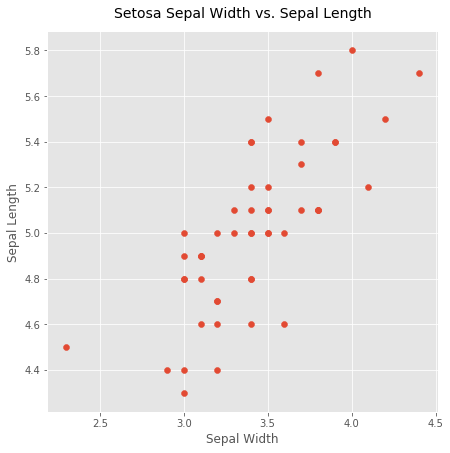

In [1]:
import os
import pandas as pd
import requests

PATH = r'/data/src/iris/'
# r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
# with open(PATH + 'iris.data', 'w') as f:
#   f.write(r.text)

os.chdir(PATH)

df = pd.read_csv(PATH + 'iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df['sepal width'][:50], df['sepal length'][:50])
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02)

In [2]:
import statsmodels.api as sm

y = df['sepal length'][:50]
x = df['sepal width'][:50]
X = sm.add_constant(x)

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal length   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           4.75e-10
Time:                        11:34:54   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6447      0.305      8.660      

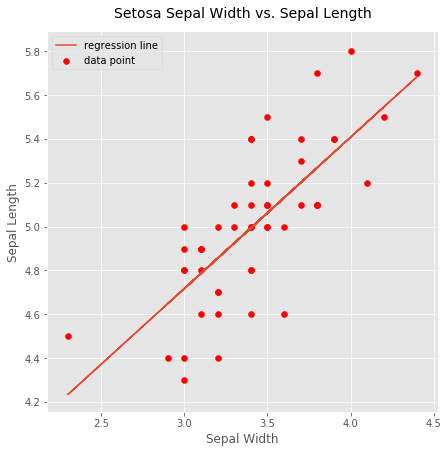

In [3]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, results.fittedvalues, label='regression line')
ax.scatter(x, y, label='data point', color='r')
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02)
ax.legend(loc=2)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

clf = RandomForestClassifier(max_depth=5, n_estimators=10)

X = df.ix[:,:4]
y = df.ix[:,4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)
    
rf

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-

,predicted,actual,correct
0,Iris-versicolor,Iris-versicolor,1
1,Iris-versicolor,Iris-versicolor,1
2,Iris-versicolor,Iris-versicolor,1
3,Iris-versicolor,Iris-versicolor,1
4,Iris-setosa,Iris-setosa,1
5,Iris-virginica,Iris-virginica,1
6,Iris-setosa,Iris-setosa,1
7,Iris-setosa,Iris-setosa,1
8,Iris-setosa,Iris-setosa,1
9,Iris-virginica,Iris-virginica,1


In [5]:
rf['correct'].sum()/rf['correct'].count()

0.9555555555555556

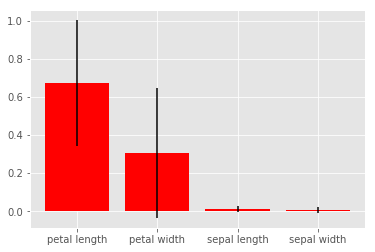

In [10]:
f_importances = clf.feature_importances_
f_names = df.columns[:4]
f_std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)
imps = [x[0] for x in zzs]
labels = [x[1] for x in zzs]
errs = [x[2] for x in zzs]
plt.bar(range(len(f_importances)), imps, color="r", yerr=errs, align="center")
plt.xticks(range(len(f_importances)), labels);

In [14]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

clf = OneVsRestClassifier(SVC(kernel='linear'))

X = df.ix[:,:4]

y = np.array(df.ix[:,4].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)
rf

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,predicted,actual,correct
0,Iris-setosa,Iris-setosa,1
1,Iris-setosa,Iris-setosa,1
2,Iris-versicolor,Iris-versicolor,1
3,Iris-versicolor,Iris-versicolor,1
4,Iris-virginica,Iris-versicolor,0
5,Iris-virginica,Iris-virginica,1
6,Iris-virginica,Iris-versicolor,0
7,Iris-setosa,Iris-setosa,1
8,Iris-virginica,Iris-virginica,1
9,Iris-virginica,Iris-virginica,1


In [15]:
rf['correct'].sum()/rf['correct'].count()

0.9333333333333333